# Credit Card Customer Churn Analysis <img src="https://media3.giphy.com/media/mGNO9zHJpV9JOVRz1L/giphy.gif" width="50" height="50" />

## Introduction

### Problem

Customer acquisition is usually more costly to the business than retaining an existing customer. In this EDA we look at churn data for credit card customers, to analyze the possible factors involved in churn, for the bank to have actionable insights.

EDA will not be using ML techniques.

![alt](https://media0.giphy.com/media/kt6rktnml8cPSdpHF9/giphy.gif)


### Data

Data set is acquired from https://www.kaggle.com/sakshigoyal7/credit-card-customers

It contains information on 10,000 customers, with 18 features for analysis. Attrition in this data set is at 16.07%.

| Attribute | Definition |
|-----------|------------|
|CLIENTNUM | Unique identifier for the client|
|Attrition_Flag| 1 = closed account|
|Customer_Age| Customer's age in years|
|Gender| M/F|
|Dependent_Count|Number of dependents|
|Education_Level|Qualification level of account holder|
|Marital_Status|Married, Single, Divorced, or Unknown|
|Income_Category|Income category in 4 brackets|
|Card_Category|Product variable: Blue, Silver, Gold, Platinum|
|Months_on_book|Period of relationship with the bank|
|Total_Relationship_Count|Total no. of products held by the customer|
|Months_Inactive_12_mon|No. of mths inactive in the past 12 mths|
|Contacts_Count_12_mon|No. of contacts with the bank in the past 12 mths|
|Credit_Limit|Credit limit on the card|
|Total_Revolving_Bal|Revolving balance is credit that is carried over, high revolving balance indicates a reliance on credit|
|Avg_Open_To_Buy|Avg open to buy credit line|
|Total_Amt_Chng_Q4_Q1|Change in txn amt Q4 over Q1|
|Total_Trans_Amt|Total txn amt (last 12 mths)|
|Total_Trans_Ct|Total txn count (last 12 mths)|
|Total_Ct_Chng_Q4_Q1|Change in txn count Q4 over Q1|
|Avg_Utilization_Ratio|Avg card utilization ratio|



## Data Cleaning and Preparation 

### Data Download

In [674]:
!kaggle datasets download -d sakshigoyal7/credit-card-customers

credit-card-customers.zip: Skipping, found more recently modified local copy (use --force to force download)


In [675]:
import zipfile
with zipfile.ZipFile("credit-card-customers.zip", "r") as zip_ref:
    zip_ref.extractall()

### Data Checks and Cleansing

In [676]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import matplotlib as mpl
import missingno as msno

%matplotlib inline
plt.style.use("ggplot")

In [677]:
df = pd.read_csv('BankChurners.csv')
#dropping last 2 columns as they are irrelavent to analysis
cols = [-1,-2]
df.drop(df.columns[cols],axis=1,inplace=True)

In [678]:
#Setting index, checking data types
df.set_index('CLIENTNUM', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 768805383 to 714337233
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  

In [679]:
df.shape

(10127, 20)

In [680]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,,,,,,,,,,,,,,,,,,,,
768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


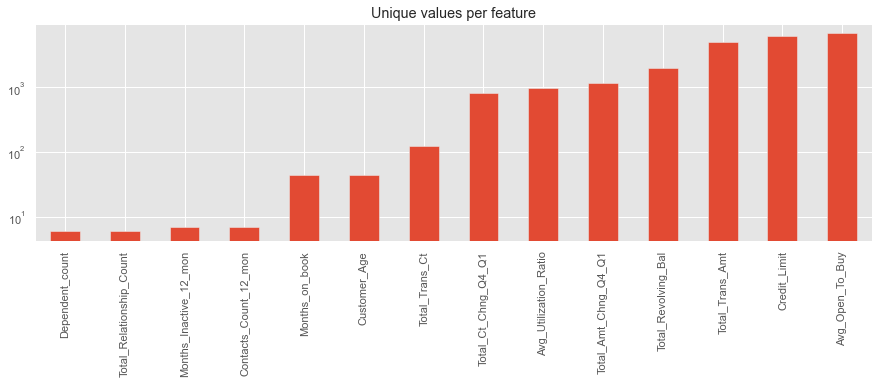

In [681]:
# no.   of unique values of each feature
unique_values = df.select_dtypes(
  include="number").nunique().sort_values()

unique_values.plot.bar(logy=True, figsize=(15, 4),
                       title="Unique values per feature");

In [682]:
# Check values of categorical dimensions 
for x in df.columns:
    if df[x].dtypes == object:
        print(df[x].value_counts()) 

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
F    5358
M    4769
Name: Gender, dtype: int64
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64


We see that some categories have a portion of 'Unknowns':
- Education Level
- Marital Status
- Income Category

In [683]:
df.replace({'Unknown': np.NaN}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 768805383 to 714337233
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           8608 non-null   object 
 5   Marital_Status            9378 non-null   object 
 6   Income_Category           9015 non-null   object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  

In [684]:
df.duplicated().sum()

0

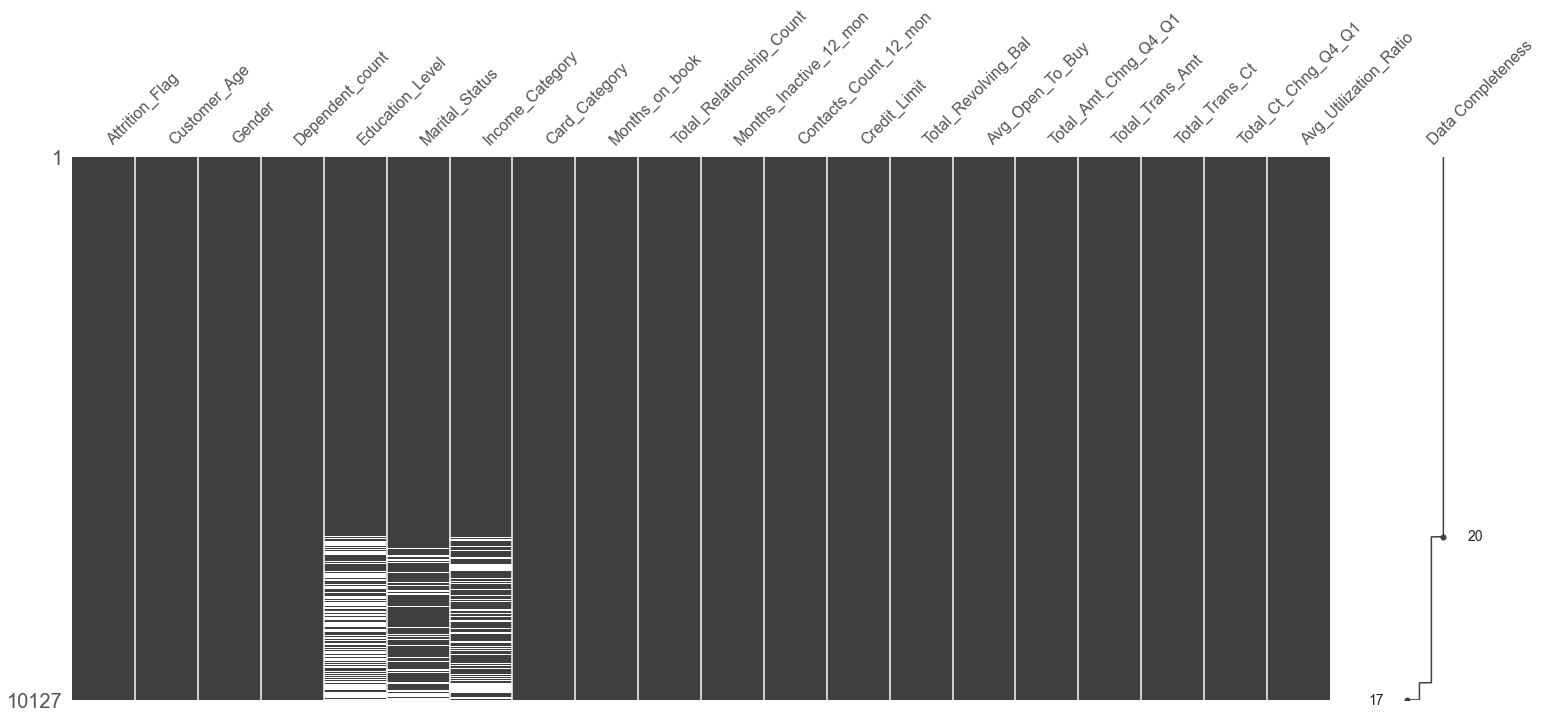

In [685]:
msno.matrix(df, labels=True, sort="descending");

<AxesSubplot:title={'center':'% of missing values per feature'}, ylabel='ratio of missing values per feature'>

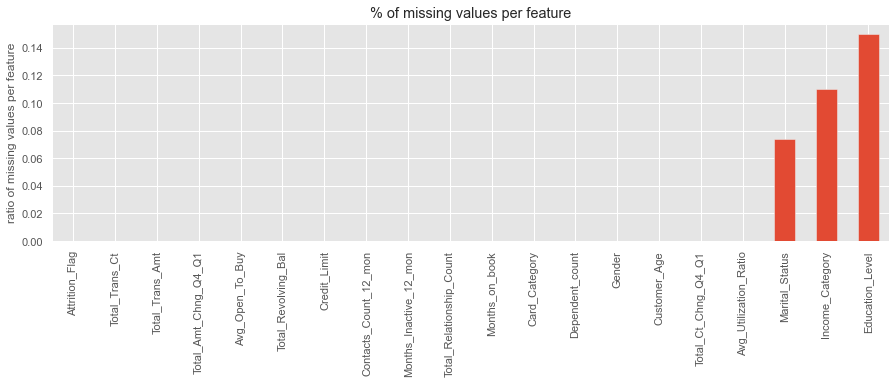

In [686]:
df.isna().mean().sort_values().plot(
    kind='bar', figsize=(15,4),
    title='% of missing values per feature',
    ylabel = 'ratio of missing values per feature'
)

In [687]:
#na seems clustered, drop na
df.dropna(axis=0, how='any', inplace=True)
df.shape

(7081, 20)

In [688]:
#Replace for ordinal to be sortable
income_dict = {
    #'Unknown' : 0,
    'Less than $40K' : 1,
    '$40K - $60K' : 2,
    '$60K - $80K' : 3,
    '$80K - $120K' : 4,
    '$120K +' : 5
}

education_dict = {
    #'Unknown' : 0,
    'Uneducated': 1,
    'High School': 2,
    'College' : 3,
    'Graduate' : 4,
    'Post-Graduate' : 5,
    'Doctorate' : 6
}

card_dict = {
    'Blue' : 1,
    'Silver': 2,
    'Gold' : 3, 
    'Platinum': 4
    
}

df['Income_Category'] = df['Income_Category'].replace(income_dict)
df['Education_Level'] = df['Education_Level'].replace(education_dict)
df['Card_Category'] = df['Card_Category'].replace(card_dict)
print(df['Income_Category'].unique(), df['Education_Level'].unique())

[3 1 4 2 5] [2 4 1 3 5 6]


In [689]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7081 entries, 768805383 to 714337233
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            7081 non-null   object 
 1   Customer_Age              7081 non-null   int64  
 2   Gender                    7081 non-null   object 
 3   Dependent_count           7081 non-null   int64  
 4   Education_Level           7081 non-null   int64  
 5   Marital_Status            7081 non-null   object 
 6   Income_Category           7081 non-null   int64  
 7   Card_Category             7081 non-null   int64  
 8   Months_on_book            7081 non-null   int64  
 9   Total_Relationship_Count  7081 non-null   int64  
 10  Months_Inactive_12_mon    7081 non-null   int64  
 11  Contacts_Count_12_mon     7081 non-null   int64  
 12  Credit_Limit              7081 non-null   float64
 13  Total_Revolving_Bal       7081 non-null   int64  


## Data Exploration

In [690]:
#assigning some colors to var for easy use
color_0 = '#b6ccfe'
color_1 = '#FF758F'

color_high = '#FF758F'
color_low = '#b6ccfe'
color_no = '#b0b18c'

#setting sns palette to have color consistency for attrited customers (red)
attr_pal = {Attrition_Flag: color_1 if Attrition_Flag == 'Attrited Customer' else color_0 for Attrition_Flag in df['Attrition_Flag'].unique()}

In [691]:
#Since we will be splicing often by attrition, we create 2 dfs

attr1 = df[df['Attrition_Flag']=='Attrited Customer']
attr0 = df[df['Attrition_Flag']=='Existing Customer']


### Overview

Assumption:
Since the data captures several aggregated numbers over the past 12 months, we assume the attrition is at the end of these 12 months, i.e. the data set is a snapshot of customers where the attrited customers have just exited their relationship with the bank (or cancelled their credit card). We make this assumption because if the attrition could have happened at any point, several metrics would not be accurate.

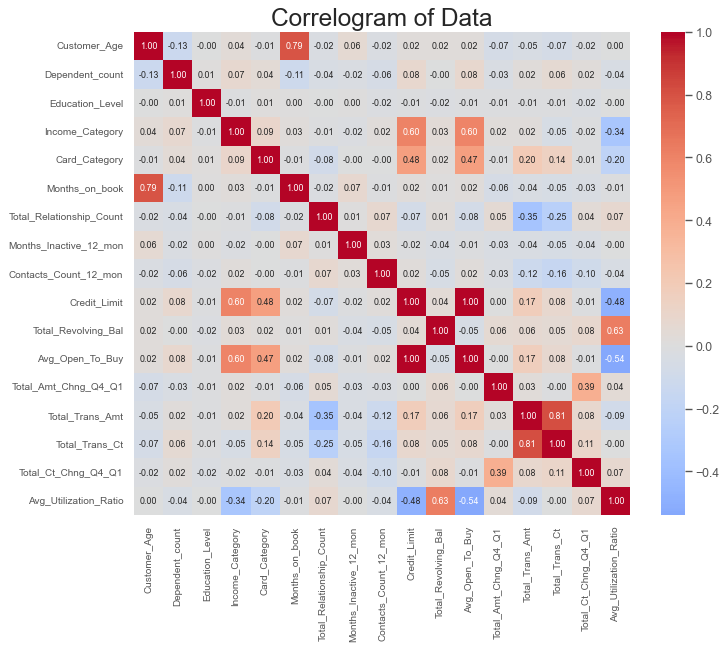

In [692]:
#check for any correlations
plt.figure(figsize=(10,8), dpi=80)
sns.heatmap(df.corr(),xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='coolwarm', center=0, annot=True, annot_kws={"size":8}, fmt='.2f')

plt.title('Correlogram of Data', fontsize = 22)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.show()

Most correlation here makes sense as they measure similar or overlapping concepts (for e.g. credit limit and open to buy, revolving balance and utilization etc)

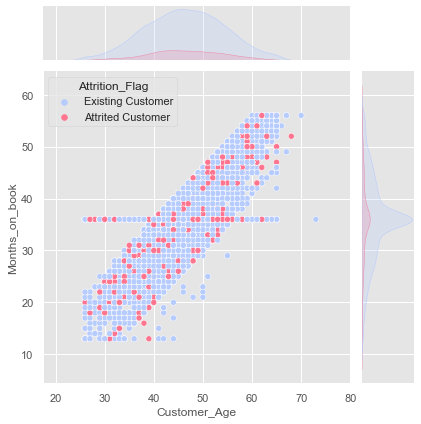

In [693]:
#investigate correlation of age and months on book
sns.jointplot(x='Customer_Age', y='Months_on_book', kind='scatter', hue='Attrition_Flag',data=df, palette=attr_pal)

We see that older customers tend to have had their card longer, though there is no clear pattern of attrition by age. 
(Since customer age range spans 40+ years and months on book span approximately 1-5 years, it is unlkely their age allows them a longer period to have had the card)

In [694]:
df.describe()

,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000
mean,46.347691,2.337805,3.065810,2.343313,1.082757,35.981359,3.819376,2.342607,2.454456,8492.773831,1167.501624,7325.272207,0.760584,4394.299816,64.503319,0.711508,0.282313
std,8.041225,1.291649,1.404962,1.355904,0.328819,8.002609,1.544444,0.995104,1.104917,9126.072520,812.315606,9131.217585,0.223139,3468.461606,23.809330,0.238693,0.278731
min,26.000000,0.000000,1.000000,1.000000,1.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,2.000000,1.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2498.000000,463.000000,1248.000000,0.629000,2089.000000,44.000000,0.583000,0.026000
50%,46.000000,2.000000,3.000000,2.000000,1.000000,36.000000,4.000000,2.000000,2.000000,4287.000000,1282.000000,3250.000000,0.735000,3831.000000,67.000000,0.700000,0.186000
75%,52.000000,3.000000,4.000000,4.000000,1.000000,40.000000,5.000000,3.000000,3.000000,10729.000000,1781.000000,9491.000000,0.858000,4740.000000,80.000000,0.818000,0.515000
max,73.000000,5.000000,6.000000,5.000000,4.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,17995.000000,134.000000,3.714000,0.999000


Over the course of 1 year (Q4 compared to Q1), the total amount change and count of transaction changed was disproportionately less than 1, indicating a decrease in usage for most customers. This might indicate a trend that customers use their cards less the longer they have it. Let's analyze the card usage.


### Analysis of Card Usage

#### Q1 to Q4 Change

Let's first confirm that for a majority of customers, there is indeed a negative change in spending patterns from Q1 to Q4.

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

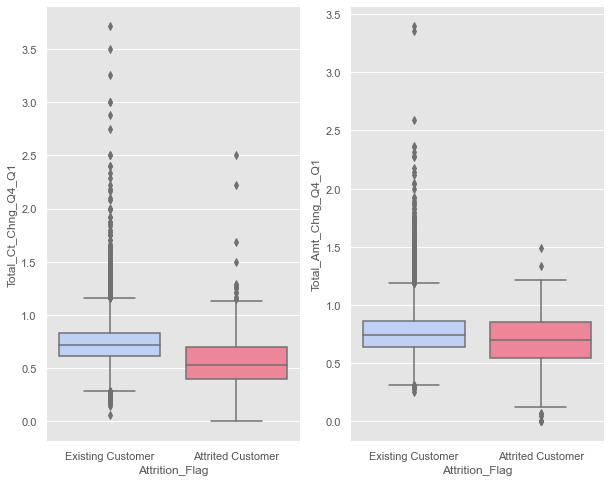

In [695]:
fig, ax = plt.subplots(1,2, figsize=(10, 8))
sns.boxplot(ax=ax[0], x= 'Attrition_Flag', y='Total_Ct_Chng_Q4_Q1', data=df, palette=attr_pal)
sns.boxplot(ax=ax[1], x= 'Attrition_Flag', y='Total_Amt_Chng_Q4_Q1', data=df, palette=attr_pal)
plt.tight_layout

- We see that most customers do indeed decrease their spending in Q4 compared to Q1. 
- Those who increased their usage signficantly tend to be outliers
- There is some difference in the transaction count for attrited customers, who in general decrease their transactions more.
- Attrited customers seem to spend more per transaction

In [696]:
df['avg_txn'] = df['Total_Trans_Amt']/df['Total_Trans_Ct']
attr1 = df[df['Attrition_Flag']=='Attrited Customer']
attr0 = df[df['Attrition_Flag']=='Existing Customer']


In [697]:
x= (df.groupby('Attrition_Flag')[('Total_Trans_Ct', 'Total_Trans_Amt', 'avg_txn')]
.mean()
.reset_index())
x

/var/folders/6d/96h221p92jg8x8fls421pbkw0000gn/T/ipykernel_44601/3101493867.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  x= (df.groupby('Attrition_Flag')[('Total_Trans_Ct', 'Total_Trans_Amt', 'avg_txn')]


,Attrition_Flag,Total_Trans_Ct,Total_Trans_Amt,avg_txn
0,Attrited Customer,44.807727,3106.296496,63.653195
1,Existing Customer,68.176441,4634.505529,62.336678


Attritted customers do spend slightly more per transaction. Overall, they make less transactions and spend less. 

#### Months on Book vs Card Usage

Text(0.5, 1.05, 'Total Txn Amt by Months on Book')

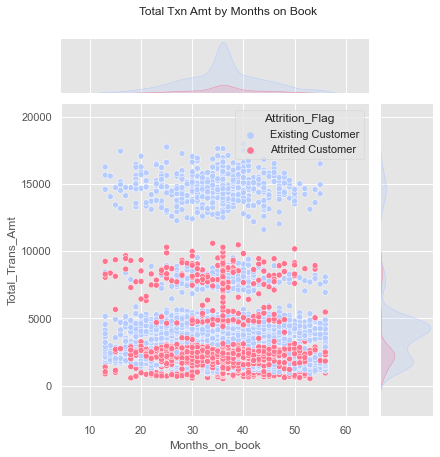

In [698]:
#investigate if usage decrease is seasonal
#longer possession of card = lower usage?

sns.jointplot(data=df, x='Months_on_book', y='Total_Trans_Amt', hue='Attrition_Flag', palette=attr_pal)
plt.suptitle('Total Txn Amt by Months on Book', y=1.05)

Text(0.5, 1.05, 'Total Txn Amt by Months on Book')

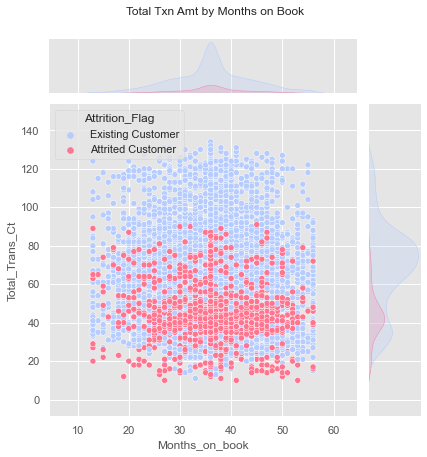

In [699]:
sns.jointplot(data=df, x='Months_on_book', y='Total_Trans_Ct', hue='Attrition_Flag', palette=attr_pal)
plt.suptitle('Total Txn Amt by Months on Book', y=1.05)

Text(0.5, 1.05, 'Total Txn Amt by Months on Book')

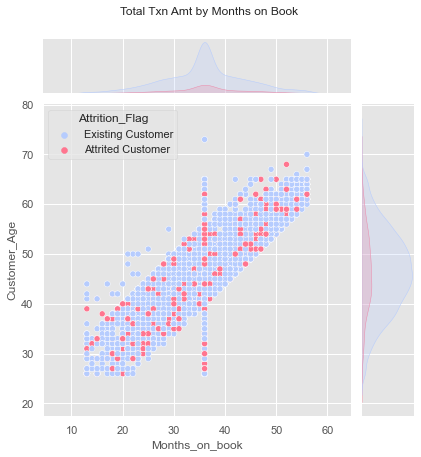

In [700]:
sns.jointplot(data=df, x='Months_on_book', y='Customer_Age', hue='Attrition_Flag', palette=attr_pal)
plt.suptitle('Total Txn Amt by Months on Book', y=1.05)

- Customers months on book do not clearly affect their usage (whether by amount or number of transactions)

- Customers spend amount tend to fall in 3 clear categories, though a majority are in the low spending category

- Customers who use their card alot (total spend above 13k or total count above 100) show no attrition

Text(0, 0.5, 'Txn Amt')

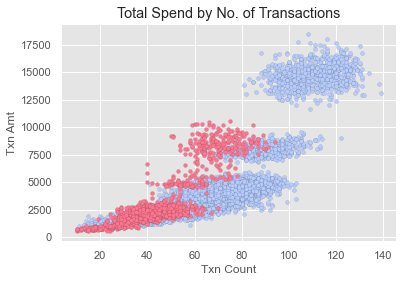

In [701]:
#checking relationship between total count/spend
fig, ax = plt.subplots()
ax.title.set_text('Total Spend by No. of Transactions')
ax.scatter(txn_cnt_0,txn_amt_0, color=color_0, s=16, edgecolors = '#2e2e2e', linewidth = 0.1)
ax.scatter(txn_cnt_1,txn_amt_1, color=color_1, s=16, edgecolors = '#2e2e2e', linewidth = 0.1)
ax.set_xlabel('Txn Count')
ax.set_ylabel('Txn Amt')

##### Key Observation: Customers in high category of spending and transaction count are highly unlikely to attrite

#### Card Usage by Spending Categorization

In [702]:
#separate customers into the spending categories shown in the chart above
#how many percent are high spenders, low spenders etc?

bins = [0,6499,11249,20000]
binlabel = ['Low Spenders','Middle Spenders','High Spenders']
df['spend_cat'] = pd.cut(x=df['Total_Trans_Amt'], bins=bins, labels=binlabel)

attr1 = df[df['Attrition_Flag']=='Attrited Customer']
attr0 = df[df['Attrition_Flag']=='Existing Customer']

#confirm we have captured the 'big spenders' with no attrition:
print(len(attr1[attr1['spend_cat']=='High Spenders']))

df['spend_cat'].value_counts(normalize=True).mul(100)

0


Low Spenders       85.454032
High Spenders       7.654286
Middle Spenders     6.891682
Name: spend_cat, dtype: float64

[Text(0.5, 0, 'Income Categories: Low to High'),
 Text(0.5, 1.0, 'High Spenders Income Category')]

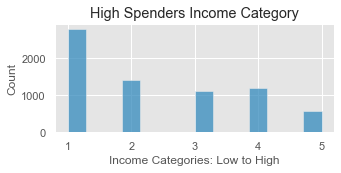

In [703]:
#can only high income customers afford to spend high?
fig,ax=plt.subplots(figsize=(5,2))
sns.histplot(x=df['Income_Category'].astype(int), data= df[df['spend_cat']=='High Spenders']).set(xlabel='Income Categories: Low to High', title='High Spenders Income Category')

[Text(0.5, 1.0, 'Total Revolving Balance for High Spenders'), Text(0.5, 0, '')]

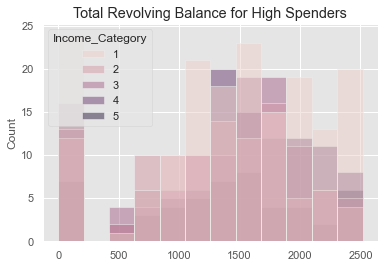

In [704]:
#do high spenders in lower income incur credit?
#using TRB as proxy since we have no data on overdue

sns.histplot(x='Total_Revolving_Bal', data= df[df['spend_cat']=='High Spenders'], hue='Income_Category').set(title='Total Revolving Balance for High Spenders', xlabel='')

- high spenders constitute less than 8% of the customers
- not restricted to customers with high incomes (actually more high spenders are customers with lower income)
- high spenders do not necessarily utilize revolving credit
- higher income customers do use less revolving credit

***The bank can encourage all customers to increase their spending on the card as a strategy to lower attrition***

### Overview of Categories

#### Percentages of Attrition Across Categories

In [705]:
#Age bins
bins = [20,30,40,50,60,70,80]
binlabel = ['21-30','31-40','41-50','51-60','61-70','71-80']
df['age_bin'] = pd.cut(x=df['Customer_Age'], bins=bins, labels=binlabel)

In [706]:
#refresh our attrition dfs with the bins
attr1 = df[df['Attrition_Flag']=='Attrited Customer']
attr0 = df[df['Attrition_Flag']=='Existing Customer']

In [707]:
categorical = []
continuous = []
for col in df.columns:
    if len(df[col].unique()) < 10:
        categorical.append(col)
    else:
        continuous.append(col)

print(categorical)

['Attrition_Flag', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'spend_cat', 'age_bin']


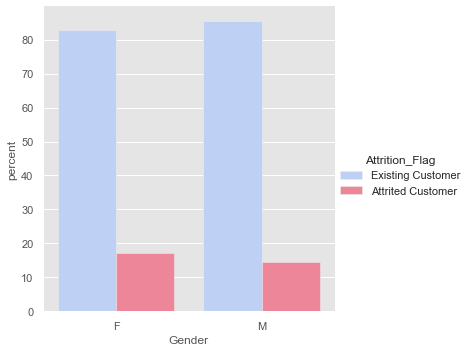

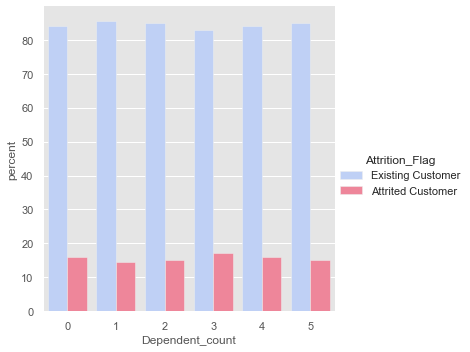

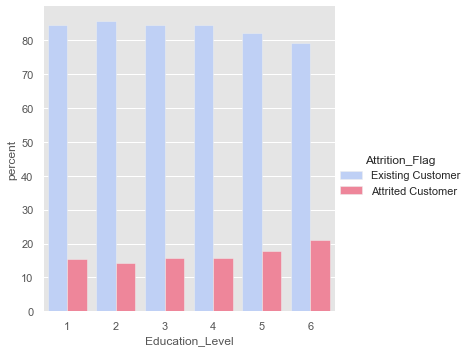

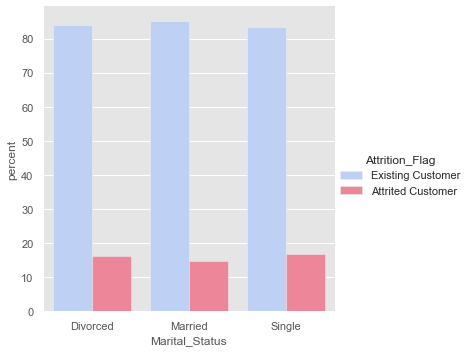

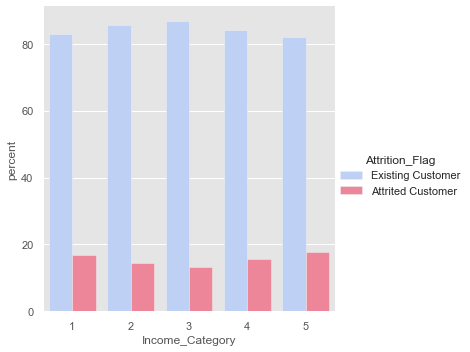

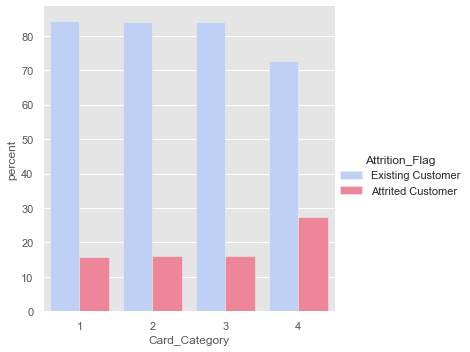

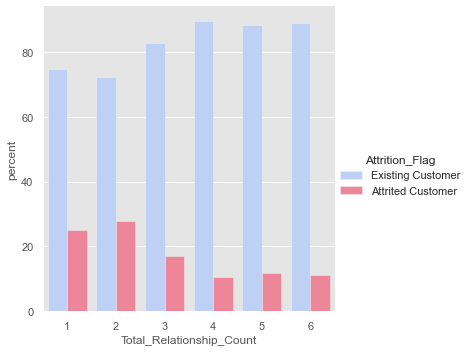

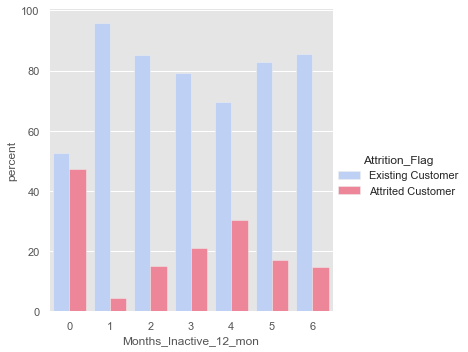

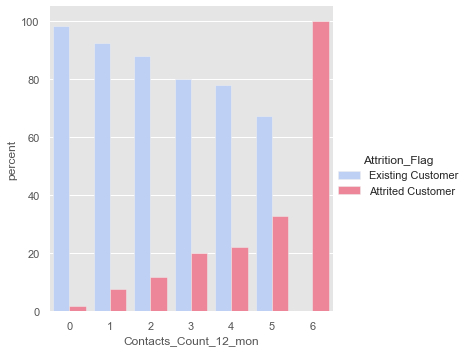

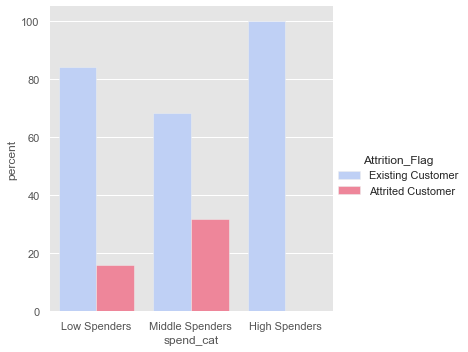

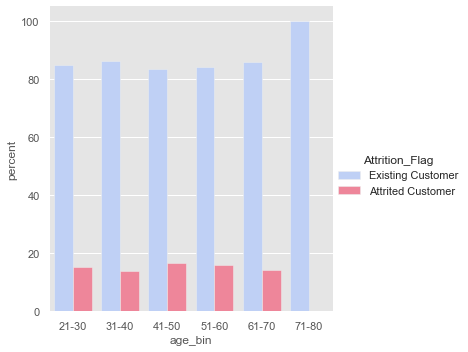

In [708]:
#percentage catplot for all categorical dimensions
for cat in categorical:
    if cat == 'Attrition_Flag':
        pass
    else:
        x = cat
        y = 'Attrition_Flag'

        (df
        .groupby(x)[y]
        .value_counts(normalize=True)
        .mul(100)
        .rename('percent')
        .reset_index()
        .pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar', palette=attr_pal))

Significant patterns in:
- Card Category
- Total relationship
- Inactive month
- Contact Count
- Spending Category

##### Key Observation: Contact Count seems to be a very strong indicator of attrition, together with Total Relationships, Inactive Months, and Spending Category

### Contacts Count Drill Down

#### Contacts Count and Spending Category

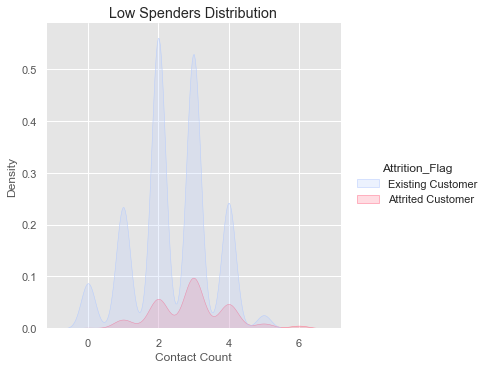

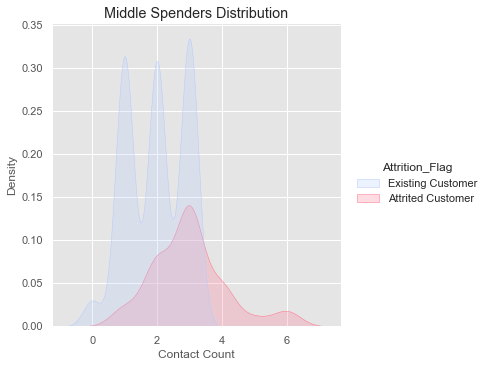

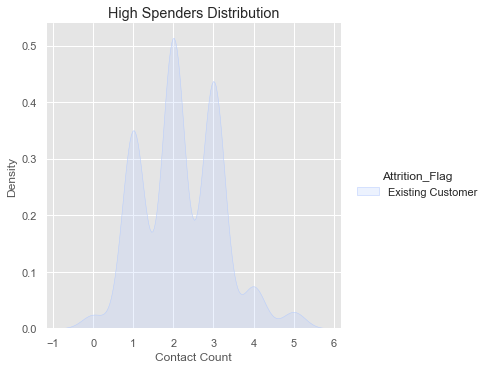

In [709]:
#does contact count vary based on spending patterns?
for cat in df['spend_cat'].unique():
    
   sns.displot(df[df['spend_cat']==cat], 
                  x='Contacts_Count_12_mon', 
                  hue='Attrition_Flag', 
                  kind="kde", 
                  #multiple='stack',
                  fill='True',
                  palette = attr_pal).set(title=cat+' Distribution').set(xlabel='Contact Count')


- ***For middle spenders, all customers with more than 4 contact counts attrite***

#### Contact Count and Total Relationship

[Text(0.5, 1.0, 'Contact Category'), Text(0.5, 0, '')]

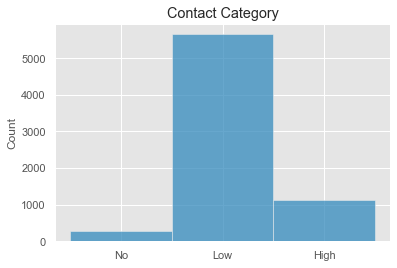

In [710]:
# Since 4 contact count seems to be a threshold for middle spenders, let's bin the contact count for analysis
bins = [-1,0,3,7]
binlabel = ['No', 'Low','High']
df['contact_cat'] = pd.cut(x=df['Contacts_Count_12_mon'], bins=bins, labels=binlabel)

contact_pal = {'High' : color_high,
                'Low' : color_low,
                'No'  : color_no

}

attr1 = df[df['Attrition_Flag']=='Attrited Customer']
attr0 = df[df['Attrition_Flag']=='Existing Customer']
sns.histplot(df['contact_cat']).set(title='Contact Category', xlabel='')



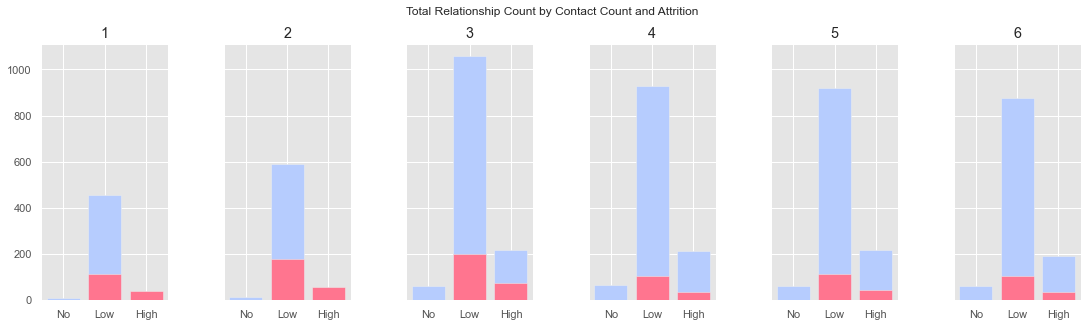

In [711]:
# What is the contact pattern for customers with different number of products held with the bank?
def stack_attr_cluster(cluster, cat_cond, title):
    fig, ax = plt.subplots(1,len(df[cat_cond].unique()),figsize=(16,5), sharey=True)
    fig.tight_layout(pad=4) 
    fig.suptitle(title)

    count=0
    for i in sorted(df[cat_cond].unique()):
        b1 = attr1[attr1[cat_cond]==int(i)][cluster].value_counts().sort_index(inplace=False)
        b0 = attr0[attr0[cat_cond]==int(i)][cluster].value_counts().sort_index(inplace=False)
        
        ax[count].title.set_text(f'{i}')
        ax[count].bar(b0.index, b0.values, color = color_0)
        ax[count].bar(b1.index, b1.values, color = color_1)
        count+=1


        

stack_attr_cluster('contact_cat', 
            'Total_Relationship_Count', 
            'Total Relationship Count by Contact Count and Attrition')

***Customers with less than 3 products with the bank and high contact count all attrite***

#### Contact Count and Income Category

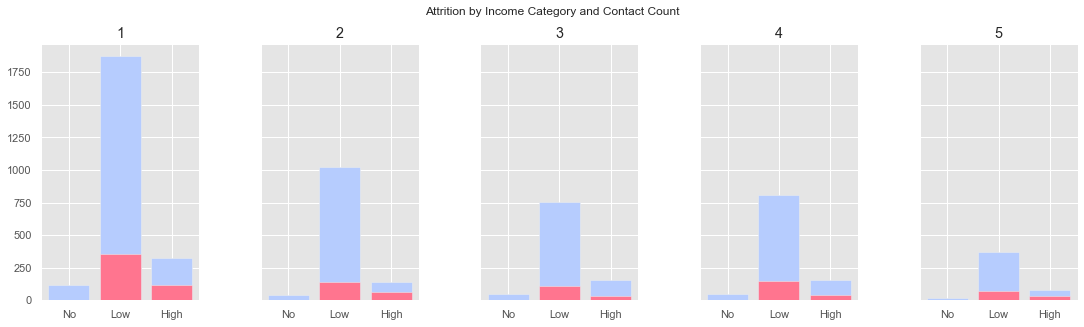

In [712]:
stack_attr_cluster('contact_cat', 
            'Income_Category', 
            'Attrition by Income Category and Contact Count')

#### Contact Count and Card Category

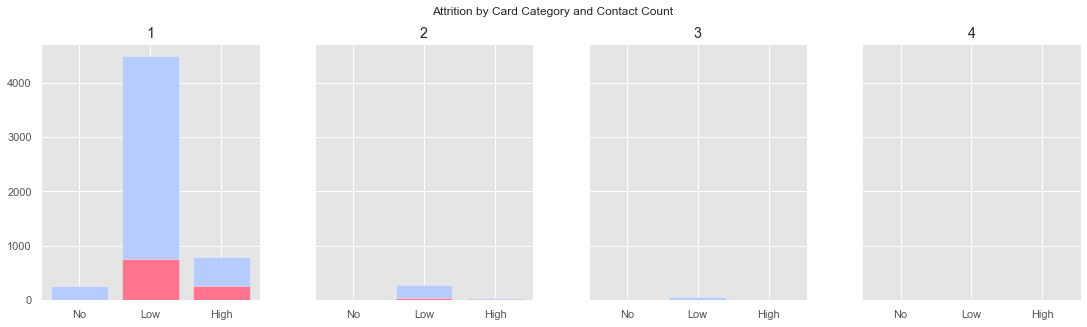

In [713]:
stack_attr_cluster('contact_cat', 
            'Card_Category', 
            'Attrition by Card Category and Contact Count')

#### Contact Count and Months Inactive

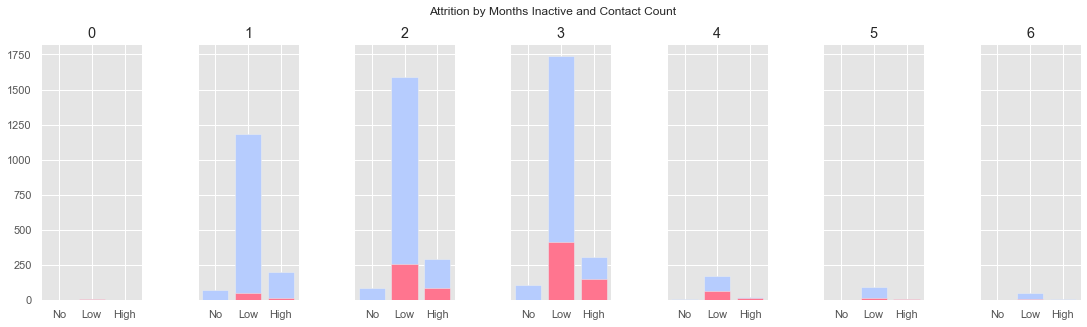

In [714]:
stack_attr_cluster('contact_cat', 
            'Months_Inactive_12_mon', 
            'Attrition by Months Inactive and Contact Count')

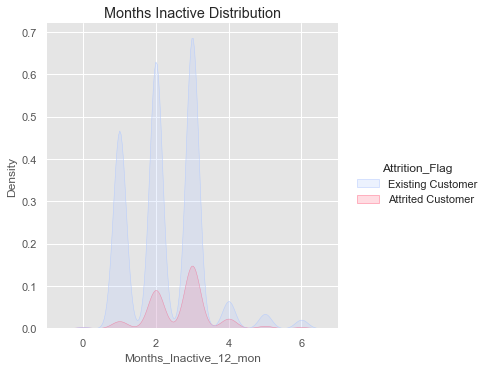

In [715]:
    sns.displot(df, 
                  x='Months_Inactive_12_mon', 
                  hue='Attrition_Flag', 
                  kind="kde", 
                  fill='True',
                  palette = attr_pal).set(title='Months Inactive Distribution')



#### Contact Count : Potential Reasons

Let's consider why customers would contact the bank from our data.

In [716]:
#average proportion of high contact for reference line
df['contact_cat'].value_counts(normalize=True)


Low     0.798475
High    0.160853
No      0.040672
Name: contact_cat, dtype: float64

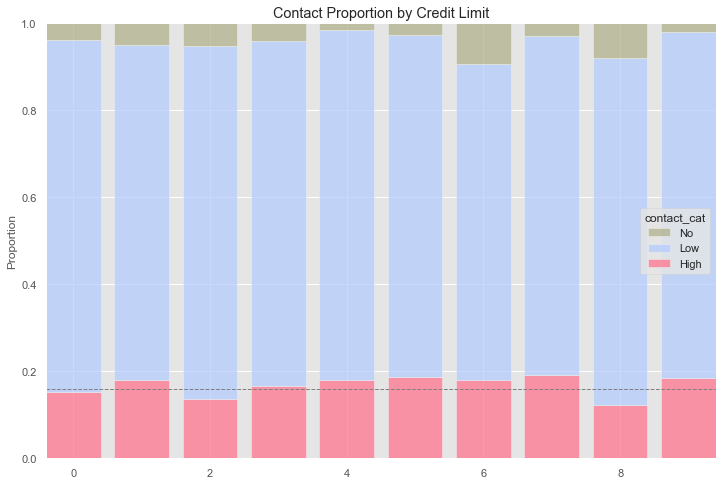

In [717]:
#to raise credit limit?
df['credit_cat_range'] = pd.cut(x=df['Credit_Limit'], bins=10)
df['credit_cat'] = pd.cut(x=df['Credit_Limit'], bins=10, labels=False)
fig,ax = plt.subplots(figsize=(12,8))
sns.histplot(data=df,
        x='credit_cat', 
        hue='contact_cat', 
        multiple='fill', stat='proportion',
        discrete=True, shrink=.8, palette = contact_pal).set(title='Contact Proportion by Credit Limit', xlabel='')
plt.axhline(y=0.16, color='grey', linestyle='--', linewidth = 1) #sets the avg for high contact count

[Text(0.5, 1.0, 'Attrition Proportion by Credit Limit')]

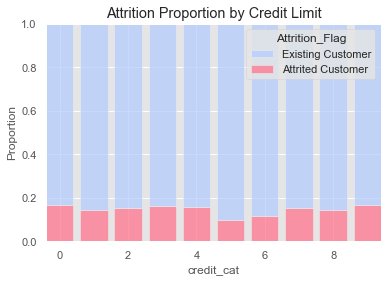

In [718]:
sns.histplot(data=df,
        x='credit_cat', 
        hue='Attrition_Flag', 
        multiple='fill', stat='proportion',
        discrete=True, shrink=.8, palette = attr_pal).set(title='Attrition Proportion by Credit Limit')

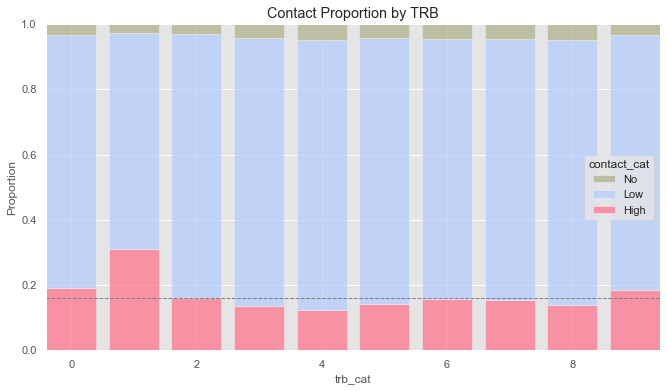

In [719]:
#due to revolving balance? (users likely pay high interest fees--could be to waive off or inquire on interest)
df['trb_cat_range'] = pd.cut(x=df['Total_Revolving_Bal'], bins=10)
df['trb_cat'] = pd.cut(x=df['Total_Revolving_Bal'], labels=False, bins=10)
fig, ax = plt.subplots(figsize=(11,6))
sns.histplot(data=df,
        x='trb_cat', 
        hue='contact_cat', 
        multiple='fill', stat='proportion',
        discrete=True, shrink=.8, palette = contact_pal).set(title='Contact Proportion by TRB')
plt.axhline(y=0.16, color='grey', linestyle='--', linewidth = 1)

In [720]:
df[df['trb_cat']==1]['trb_cat_range'].unique()


[(251.7, 503.4]]
Categories (10, interval[float64, right]): [(-2.517, 251.7] < (251.7, 503.4] < (503.4, 755.1] < (755.1, 1006.8] ... (1510.2, 1761.9] < (1761.9, 2013.6] < (2013.6, 2265.3] < (2265.3, 2517.0]]

[Text(0.5, 1.0, 'Attrition Proportion by TRB')]

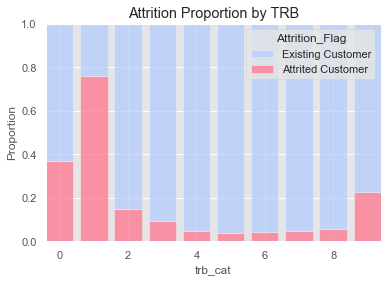

In [721]:
sns.histplot(data=df,
        x='trb_cat', 
        hue='Attrition_Flag', 
        multiple='fill', stat='proportion',
        discrete=True, shrink=.8, palette = attr_pal).set(title='Attrition Proportion by TRB')

***customers with TRB in the 250-500 range are more likely to have high contact and to attrite***

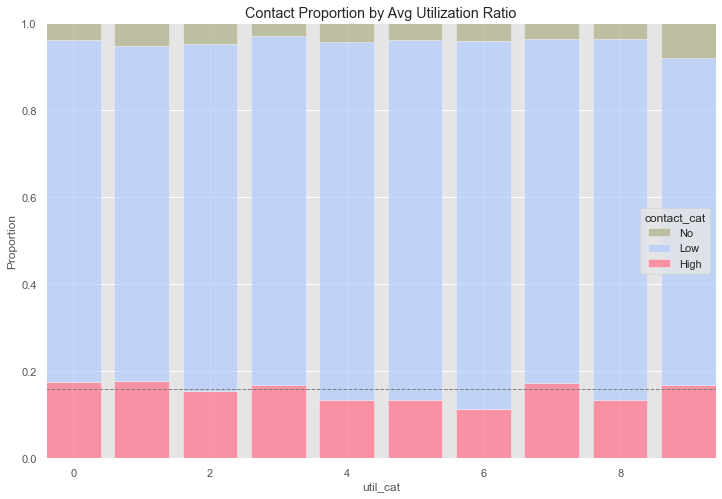

In [722]:
df['util_cat_range'] = pd.cut(x=df['Avg_Utilization_Ratio'], bins=10)
df['util_cat'] = pd.cut(x=df['Avg_Utilization_Ratio'], bins=10, labels=False)

fig, ax = plt.subplots(figsize=(12,8))
sns.histplot(data=df,
        x='util_cat', 
        hue='contact_cat', 
        multiple='fill', stat='proportion',
        discrete=True, shrink=.8, palette = contact_pal).set(title='Contact Proportion by Avg Utilization Ratio')

plt.axhline(y=0.16, color='grey', linestyle='--', linewidth = 1)

[Text(0.5, 1.0, 'Attrition Proportion by Avg Utilization Ratio')]

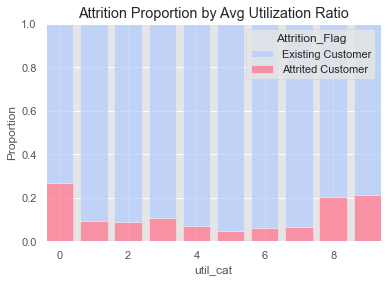

In [723]:
sns.histplot(data=df,
        x='util_cat', 
        hue='Attrition_Flag', 
        multiple='fill', stat='proportion',
        discrete=True, shrink=.8, palette = attr_pal).set(title='Attrition Proportion by Avg Utilization Ratio')

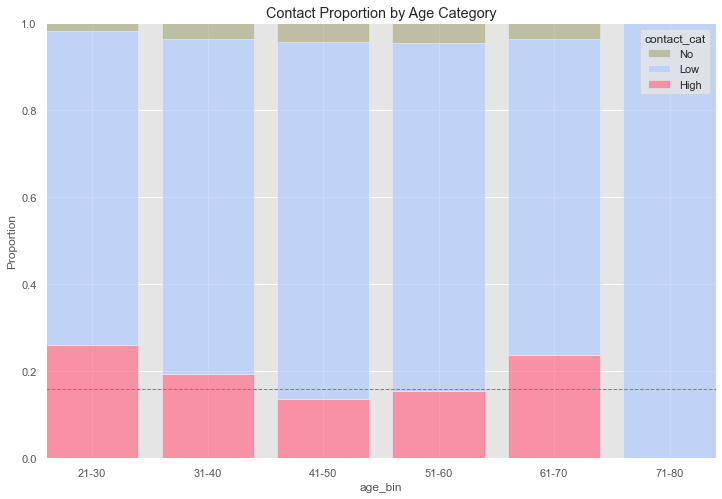

In [724]:
fig, ax = plt.subplots(figsize=(12,8))
sns.histplot(data=df,
        x='age_bin', 
        hue='contact_cat', 
        multiple='fill', stat='proportion',
        discrete=True, shrink=.8, palette = contact_pal).set(title='Contact Proportion by Age Category')

plt.axhline(y=0.16, color='grey', linestyle='--', linewidth = 1)

In [725]:
df['spend_cat'].unique()

['Low Spenders', 'Middle Spenders', 'High Spenders']
Categories (3, object): ['Low Spenders' < 'Middle Spenders' < 'High Spenders']

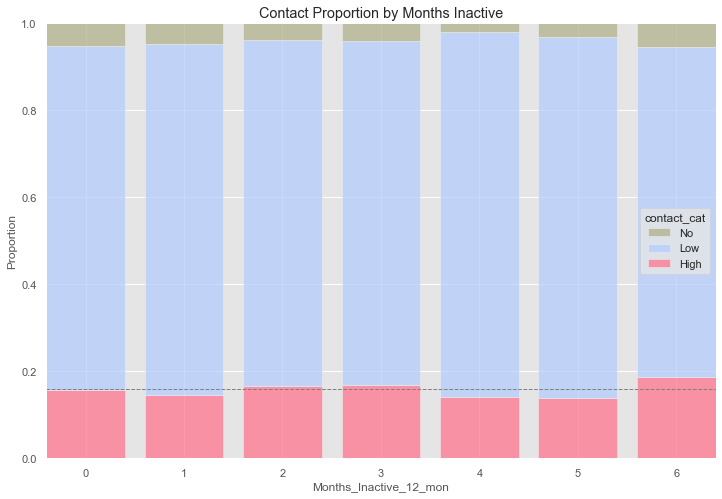

In [726]:
fig, ax = plt.subplots(figsize=(12,8))
sns.histplot(data=df,
        x='Months_Inactive_12_mon', 
        hue='contact_cat', 
        multiple='fill', stat='proportion',
        discrete=True, shrink=.8, palette = contact_pal).set(title='Contact Proportion by Months Inactive')

plt.axhline(y=0.16, color='grey', linestyle='--', linewidth = 1)

[Text(0.5, 1.0, 'Attrition by Months on Book')]

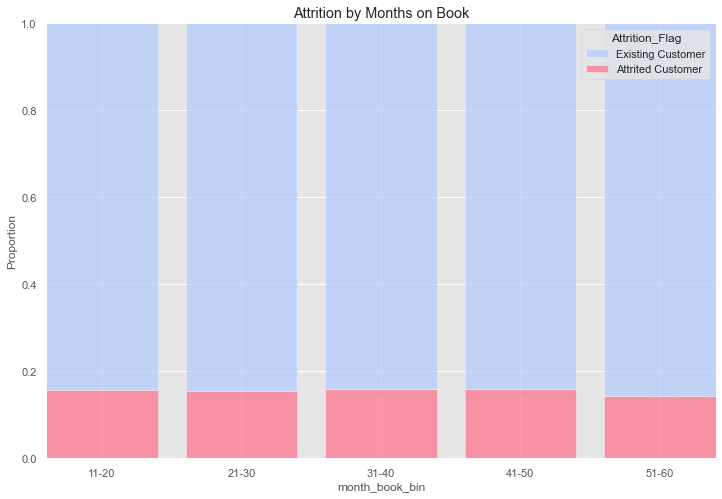

In [736]:
bins = [0,10,20,30,40,50,60]
binlabels = ['0-10','11-20','21-30','31-40','41-50','51-60']
df['month_book_bin'] = pd.cut(x=df['Months_on_book'], bins=bins, labels=binlabels)

fig, ax = plt.subplots(figsize=(12,8))
sns.histplot(data=df,
        x='month_book_bin', 
        hue='Attrition_Flag', 
        multiple='fill', stat='proportion',
        discrete=True, shrink=.8, palette = attr_pal).set(title='Attrition by Months on Book')

### Areas of Potential Growth

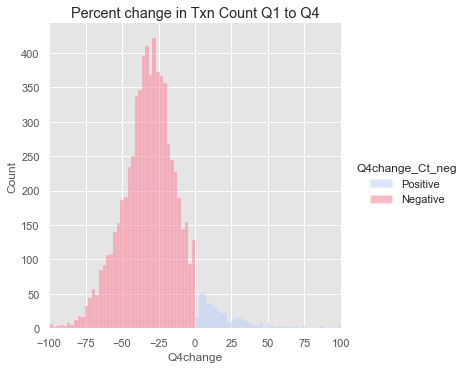

In [771]:
#number of customers with decreased usage in Q4
df['Q4change_Ct'] = df['Total_Ct_Chng_Q4_Q1'].mul(100) - 100
df['Q4change_Ct_neg'] = np.where(df['Q4change_Ct']>0, 'Positive','Negative')

neg_pos = {
    'Negative' : color_1,
    'Positive' : color_0
}

sns.displot(x='Q4change', hue='Q4change_Ct_neg', data=df, palette=neg_pos).set(title='Percent change in Txn Count Q1 to Q4', xlim=(-100,100))
#sns.histplot(x='Total_Ct_Chng_Q4_Q1', data=df)

[Text(0.5, 1.0, 'Number of Months Inactive in the Yr')]

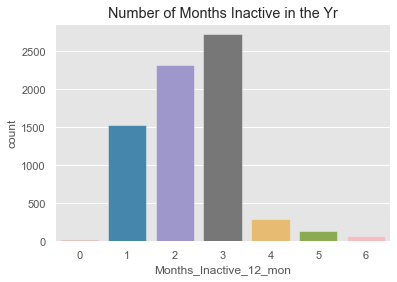

In [795]:
#number of customers by inactive months
sns.countplot(x='Months_Inactive_12_mon', data=df ).set(title='Number of Months Inactive in the Yr')